<a href="https://colab.research.google.com/github/pepetonof/IC-Tutorial/blob/main/Tutorial-IC-PSO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import random
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

#Himmelblau Function
$$f(x, y) = (x^2 + y - 11)^2 + (x + y^2 - 7)^2
$$

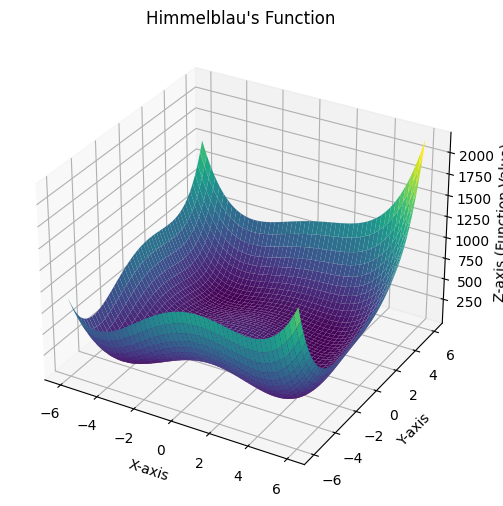

In [2]:
def himmelblau(x, y):
    return (x**2 + y - 11)**2 + (x + y**2 - 7)**2

# Create a grid of values over which to plot the function
x = np.linspace(-6, 6, 400)
y = np.linspace(-6, 6, 400)
X, Y = np.meshgrid(x, y)

# Calculate Himmelblau function values on the grid
Z = himmelblau(X, Y)

# Plotting the Himmelblau function
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')

# Add labels and title
ax.set_title("Himmelblau's Function")
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis (Function Value)')

plt.show()

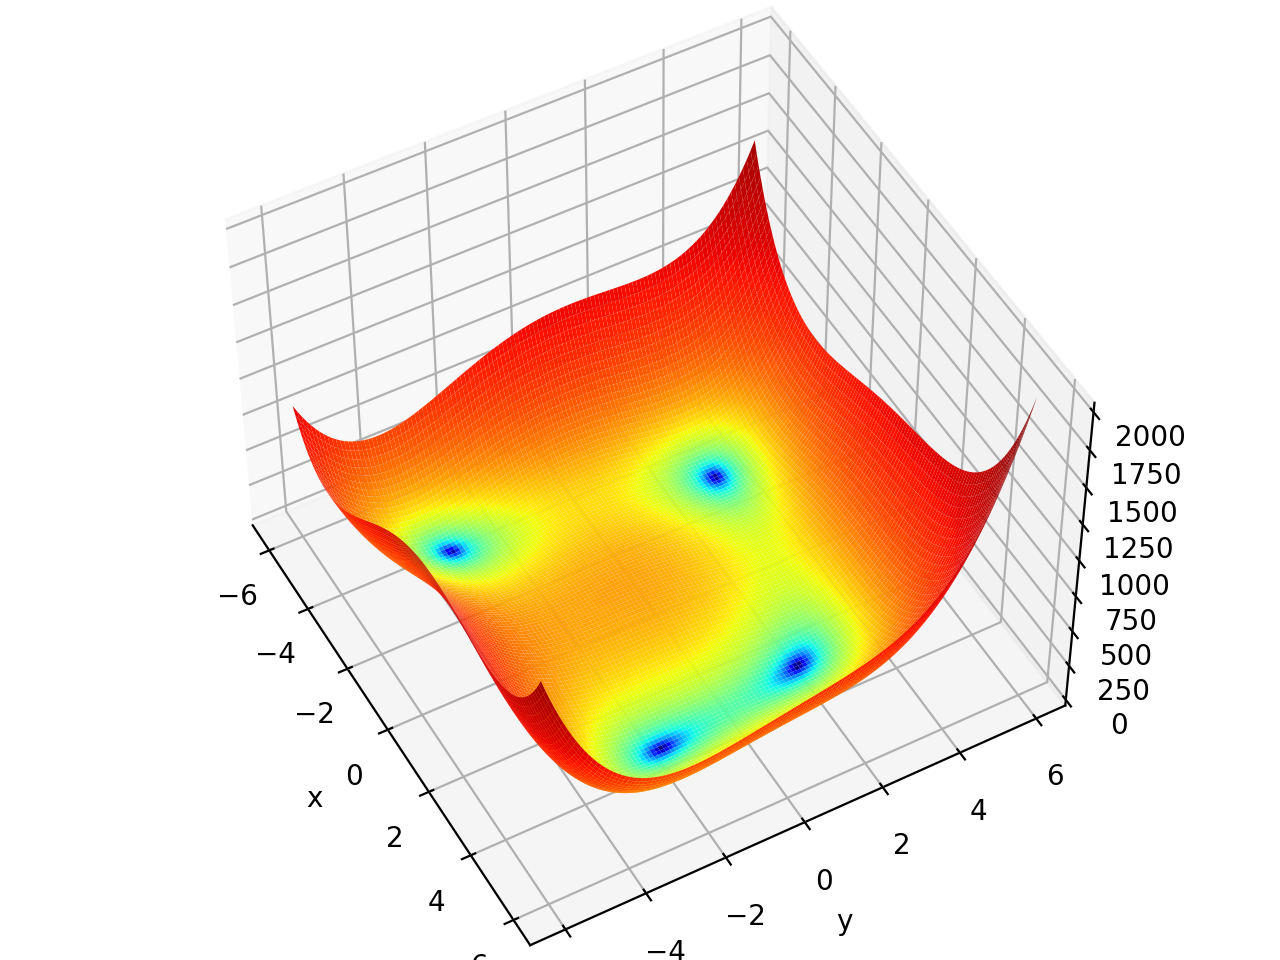

# Algoritmo PSO *gbest*


1.   Inicia el arreglo de partículas, $x_i$
2.   Inicia ciclo
3.   Para cada partícula, calcula la aptitud, $f(x_i)$
4.   Compara la aptitud de la partícula, $x_i$,con la aptitud de su componente cognitiva, $x_i.pbest$. Si $f(x_i)<f(x_i.pbest)$, remplaza $x_i.pbest$ con $x_i$.
5.   $gbest = min \{ f(x_0.pbest),...,f(x_n.pbest) \}$
6.   Calcula la velocidad $v_{i(t+1)}= v_{i(t)}+c_1r_1(x_i.pbest-x_i) + c_2r_2(gbest-x_i)$
7.   Calcula la nueva posición $x_{i(t+1)}= x_{i(t)} + v_{i(t+1)}$
8. Continúa hasta llegar a un criterio de paro



## Actualizacion de velocidad

La actualización de la velocidad para el enfoque *gbest* toma en cuenta la **componente de inercia**, **componente cognitiva**, **componente social**.

In [3]:
def update_velocity(particle, velocity, pbest, gbest,
                    w_min=0.5,
                    max=1.0,
                    c1=0.1, c2=0.1):
  # Initialise new velocity array
  num_particle = len(particle)
  new_velocity = np.array([0.0 for i in range(num_particle)])
  # Randomly generate r1, r2 and inertia weight from normal distribution
  r1 = random.uniform(0,max)
  r2 = random.uniform(0,max)
  w = random.uniform(w_min,max)
  # Calculate new velocity
  for i in range(num_particle):
    new_velocity[i] = w*velocity[i] + c1*r1*(pbest[i]-particle[i])+c2*r2*(gbest[i]-particle[i])
  return new_velocity

## Actualización de posición

Una vez actualizada la velocidad de las partículas, se actualiza su posición

In [4]:
def update_position(particle, velocity):
  # Move particles by adding velocity
  new_particle = particle + velocity
  return new_particle

## Función de aptitud

In [5]:
def fitness_function(x1, x2):
  return himmelblau(x1, x2)

## Rutina principal

Por cada generación se grafican las partículas sobre el espacio de búsqueda para observar su comportamiento a lo largo de las iteraciones

In [6]:
def pso(population, dimension, position_min, position_max, generation, fitness_criterion,
        c1, c2):
  # Initialisation
  # Population
  particles = [[random.uniform(position_min, position_max) for j in range(dimension)] for i in range(population)]
  # Particle's best position
  pbest_position = particles
  # Fitness
  pbest_fitness = [fitness_function(p[0],p[1]) for p in particles]
  # Index of the best particle
  gbest_index = np.argmin(pbest_fitness)
  # Global best particle position
  gbest_position = pbest_position[gbest_index]
  # Velocity (starting from 0 speed)
  velocity = [[0.0 for j in range(dimension)] for i in range(population)]

  # Plotting prepartion
  fig = plt.figure(figsize=(10, 10))
  ax = fig.add_subplot(111, projection='3d')
  ax.set_xlabel('x')
  ax.set_ylabel('y')
  ax.set_zlabel('z')
  x = np.linspace(position_min, position_max, 80)
  y = np.linspace(position_min, position_max, 80)
  X, Y = np.meshgrid(x, y)
  Z= fitness_function(X,Y)
  ax.plot_wireframe(X, Y, Z, color='r', linewidth=0.2)

  # Animation image placeholder
  images = []

  # Loop for the number of generation
  for t in range(generation):
    # Stop if the average fitness value reached a predefined success criterion
    #if np.average(pbest_fitness) <= fitness_criterion:
    #  break
    #else:
    for n in range(population):
      # Update the velocity of each particle
      velocity[n] = update_velocity(particles[n], velocity[n], pbest_position[n], gbest_position, c1=c1, c2=c2)
      # Move the particles to new position
      particles[n] = update_position(particles[n], velocity[n])
    # Calculate the fitness value
    pbest_fitness = [fitness_function(p[0],p[1]) for p in particles]
    # Find the index of the best particle
    gbest_index = np.argmin(pbest_fitness)
    # Update the position of the best particle
    gbest_position = pbest_position[gbest_index]

    image = ax.scatter3D([particles[n][0] for n in range(population)],
                         [particles[n][1] for n in range(population)],
                         [fitness_function(particles[n][0],particles[n][1]) for n in range(population)], c='b')
    images.append([image])


  # Print the results
  print('Global Best Position: ', gbest_position)
  print('Best Fitness Value: ', min(pbest_fitness))
  print('Average Particle Best Fitness Value: ', np.average(pbest_fitness))
  print('Number of Generation: ', t)

  # Generate the animation image and save
  ani = animation.ArtistAnimation(fig, images, interval=50, blit=True, repeat_delay=1000)  # blit=True for better performance
  writer = animation.PillowWriter(fps=10)
  ani.save('./pso_simple.gif', writer=writer)

## Parámetros de algoritmo PSO

Global Best Position:  [2.99999999 1.99999993]
Best Fitness Value:  1.0972663448315453e-13
Average Particle Best Fitness Value:  9.227774558214072e-09
Number of Generation:  99


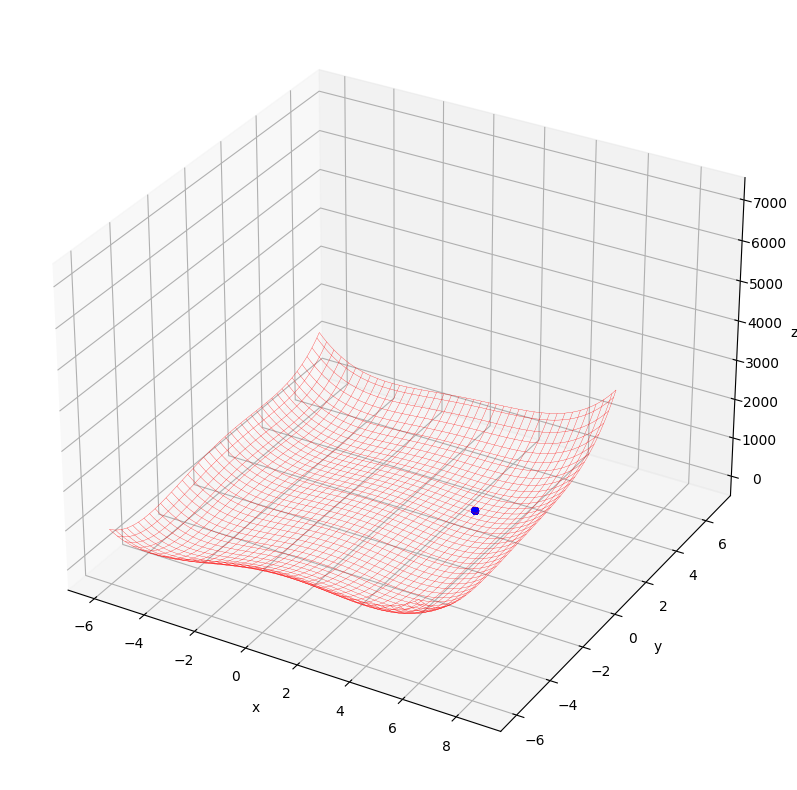

In [7]:
population = 100
dimension = 2
position_min = -6.0
position_max = 6.0
generation = 100
fitness_criterion = 10e-4

c1 = 0.2
c2 = 0.2

pso(population, dimension, position_min, position_max,
    generation, fitness_criterion, c1, c2)

In [8]:
#based on
#https://towardsdatascience.com/swarm-intelligence-coding-and-visualising-particle-swarm-optimisation-in-python-253e1bd00772